In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fredapi import Fred
import datetime

# Initialize FRED API
fred = Fred(api_key='8445855393be6d75a6d33bcddffc7958')


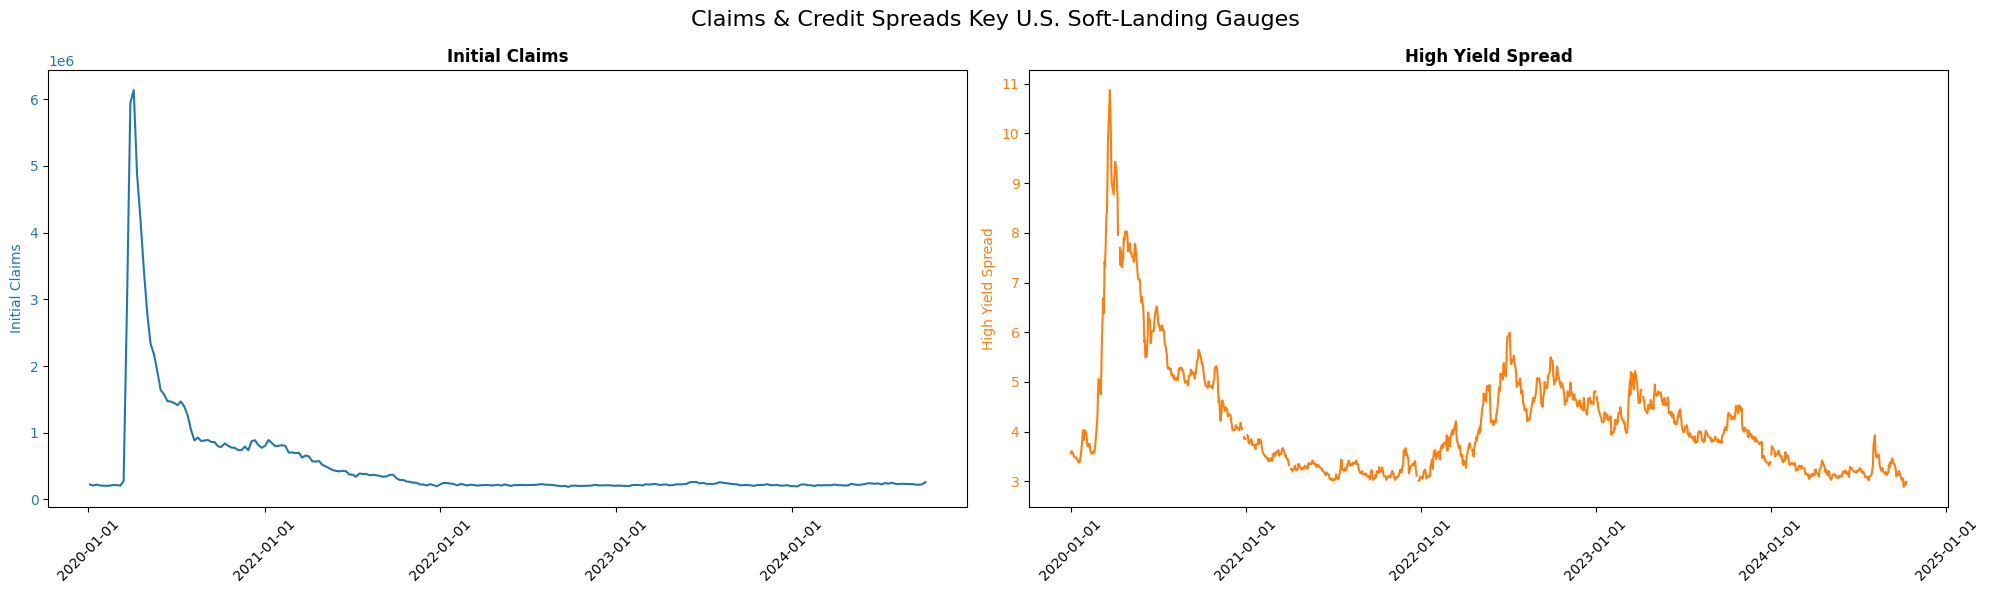

In [14]:
# Fetch data
initial_claims = fred.get_series('ICSA', observation_start='2020-01-01')
high_yield_spread = fred.get_series('BAMLH0A0HYM2', observation_start='2020-01-01')

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Initial Claims
color1 = 'tab:blue'
ax1.set_ylabel('Initial Claims', color=color1)
ax1.plot(initial_claims.index, initial_claims.values, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title('Initial Claims', fontweight='bold')
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='x', rotation=45)

# Plot High Yield Spread
color2 = 'tab:orange'
ax2.set_ylabel('High Yield Spread', color=color2)
ax2.plot(high_yield_spread.index, high_yield_spread.values, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_title('High Yield Spread', fontweight='bold')
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(axis='x', rotation=45)

# Set overall title
fig.suptitle('Claims & Credit Spreads Key U.S. Soft-Landing Gauges', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Define the series IDs and their corresponding titles
series_data = {
    #'GSCPI': 'Global Supply Chain Pressure Index', # https://www.newyorkfed.org/research/policy/gscpi#/overview
    'NAPMSDI': 'ISM Manufacturing PMI Supplier Deliveries Index',
    'RIFSRBLMFRBRIC': 'Richmond Fed Current Conditions: Vendor Lead Time (Diffusion Index)',
    'RIFSIRRMFRBRIC': 'Richmond Fed Current Conditions: Inventory Raw Materials (Diffusion Index)',
    'RIFSEBOFRBRIC': 'Richmond Fed Expectations in Six Months: Backlog of Orders (Diffusion Index)'
}

# Fetch data from FRED
start_date = '2020-01-01'
data = {}
for series_id, title in series_data.items():
    data[title] = fred.get_series(series_id, observation_start=start_date)

# Create a DataFrame
df = pd.DataFrame(data)

# Create the 3x2 plot
fig, axs = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('Supply Chain and Manufacturing Indicators', fontsize=20)

# Plot each series
for i, (title, series) in enumerate(df.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    ax.plot(series.index, series.values)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Date')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Note: Freightos Index is not available in FRED, so we'll leave one subplot blank
axs[2, 1].text(0.5, 0.5, 'Freightos Index China to West Coast\n(Data not available in FRED)', 
               ha='center', va='center', fontsize=12)
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

ValueError: Bad Request.  The series does not exist.